# Clustering : Germanan Credit Risk
In this clustering practice case we use "German Credit Risk" data set. Every tupple in the dataset represent person who take credit in a bank. Every person will clasified into a good or bad credit risk based on features on the dataset. <br>
German Credit Risk dataset can be accessed in the link : [German Credit Risk Dataset](https://www.kaggle.com/uciml/german-credit/). <br>

In [1]:
# Import Librarys
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN

### Load Data

In [2]:
# Load dataset German Credit Risk
df = pd.read_csv('german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [3]:
# Dimension of Dataset German Credit Risk
df.shape

(1000, 10)

Data German Credit scoring terdiri atas **1000 entri** dengan setiap entri dijelaskan oleh **9 features**. Detail fetures yang ada pada dataset sebagai berikut: <br> <br>
**Age** (numeric) <br>
**Sex** (text: male, female) <br>
**Job** (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled) <br>
**Housing** (text: own, rent, or free) <br>
**Saving accounts** (text - little, moderate, quite rich, rich) <br>
**Checking account** (numeric, in DM - Deutsch Mark) <br>
**Credit amount** (numeric, in DM) <br>
**Duration** (numeric, in month) <br>
**Purpose** (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others) <br>

### Drop Column
From the dataset, there is feature 'Unnamed: 0' which is not important to the next step of clustering analysis. So we decided to drop that column.

In [4]:
# Drop unimportant column --> 'Unnames: 0'
df = df.drop(columns = ['Unnamed: 0'], axis = 1)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


### Missing Values Detection

In [5]:
# Missing Values Detection
count_mv = df.isnull().sum().sort_values(ascending = False)
count_mv.head(9)

Checking account    394
Saving accounts     183
Purpose               0
Duration              0
Credit amount         0
Housing               0
Job                   0
Sex                   0
Age                   0
dtype: int64

In [6]:
# Percentage of Missing Values
pct_mv = round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False)
pct_mv.head(9)

Checking account    39.4
Saving accounts     18.3
Purpose              0.0
Duration             0.0
Credit amount        0.0
Housing              0.0
Job                  0.0
Sex                  0.0
Age                  0.0
dtype: float64

**Missing values detection** <br>
From the output above we know that there are 2 features which have missing values: <br>
- Checking account : 394 tupples or equal with 39.4% <br>
- Saving accounts : 183 tupples or equal with 18.3% <br>

### Data Type

In [7]:
# Data Type of German Credit Risk Table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


### Categorical vs. Numerical

In [8]:
# Define Categorical Variable from German Credit Risk Table
kategorik = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
df_cat = df[kategorik]
df_cat.head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose
0,male,2,own,NaN,little,radio/TV
1,female,2,own,little,moderate,radio/TV
2,male,1,own,little,NaN,education
3,male,2,free,little,little,furniture/equipment
4,male,2,free,little,little,car


Categorical features pada dataset German Credit Risk adalah: <br>
1. **Sex** : male & female
2. **Job** : 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled
3. **Housing** : own, rent, free
4. **Saving accounts** : little, moderate, quite rich, rich
5. **Checking account** : little, moderate, quite rich, rich
6. **Purpose** : car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others

In [9]:
# Define Numerical Variable from German Credit Risk Table
df_num = df.drop(kategorik, axis=1)
df_num.head()

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24


In [10]:
# Statictical Descriptive from Numerical Variable
df_num.describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


Range values of numerical variable are as below: <br>
1. **Age** : 19 - 75 years old
2. **Credit amount** : 250 - 18424 DM
3. **Duration** : 4 - 72 months

### Change Missing Values on Categorical Variable with Mode
We know that there are missing values from features 'Saving accounts' and 'Checking account'. Those features are categorical features. So that we decided to fill the missing values with mode from each features.

In [11]:
# Menggantikan missing value dengan mode untuk data categorical
df['Saving accounts'] = df['Saving accounts'].fillna(df['Saving accounts'].mode().values[0])
df['Checking account'] = df['Checking account'].fillna(df['Checking account'].mode().values[0])
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


After change the missing values with mode of each features. We make sure that there is not missing values again.

In [12]:
# Persentase missing values pada categorical variable
pct_mv2 = round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False)
pct_mv2.head(9)

Purpose             0.0
Duration            0.0
Credit amount       0.0
Checking account    0.0
Saving accounts     0.0
Housing             0.0
Job                 0.0
Sex                 0.0
Age                 0.0
dtype: float64

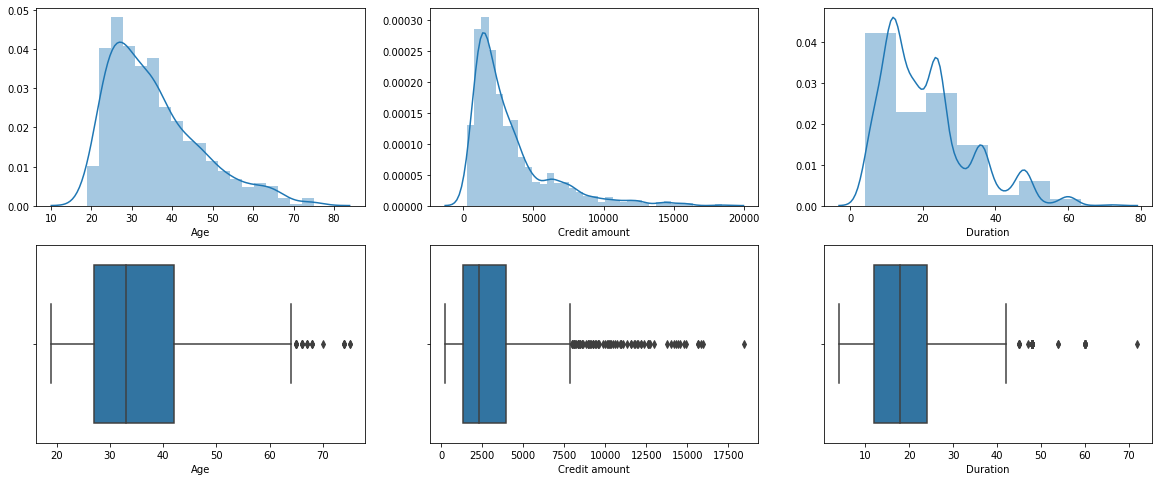

In [13]:
# Make the distplot and boxplot from the numerical features

f = plt.figure(figsize=(20,8))

f.add_subplot(2,3,1)
sns.distplot(df['Age'])

f.add_subplot(2,3,2)
sns.distplot(df['Credit amount'])

f.add_subplot(2,3,3)
sns.distplot(df['Duration'], bins=8)

f.add_subplot(2,3,4)
sns.boxplot(df['Age'])

f.add_subplot(2,3,5)
sns.boxplot(df['Credit amount'])

f.add_subplot(2,3,6)
sns.boxplot(df['Duration'])

Text(0, 0.5, '')

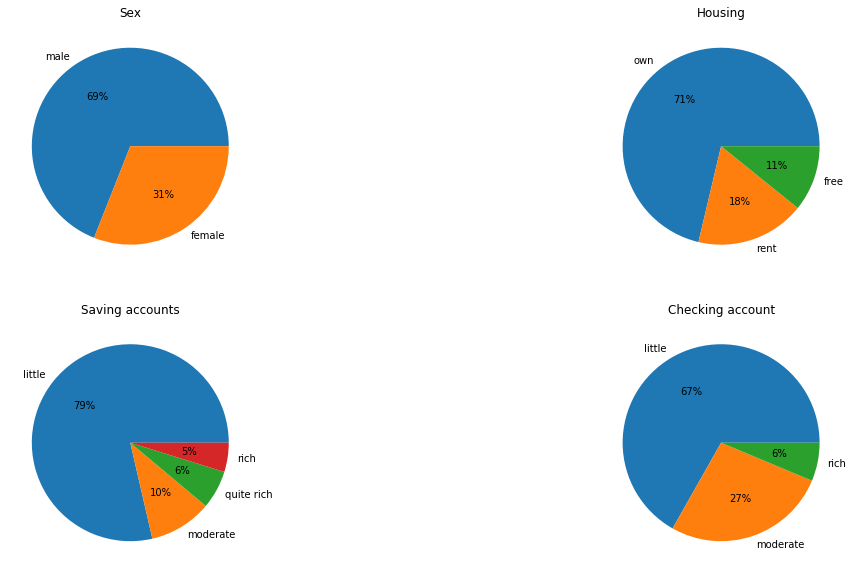

In [14]:
# Menampilkan distplot dan boxplot dari variabel categorical

f = plt.figure(figsize=(15,10))

f.add_subplot(2,3,1)
df['Sex'].value_counts().plot.pie(autopct='%.0f%%')
plt.title('Sex')
plt.ylabel('')

f.add_subplot(2,3,3)
df['Housing'].value_counts().plot.pie(autopct='%.0f%%')
plt.title('Housing')
plt.ylabel('')

f.add_subplot(2,3,4)
df['Saving accounts'].value_counts().plot.pie(autopct='%.0f%%')
plt.title('Saving accounts')
plt.ylabel('')

f.add_subplot(2,3,6)
df['Checking account'].value_counts().plot.pie(autopct='%.0f%%')
plt.title('Checking account')
plt.ylabel('')

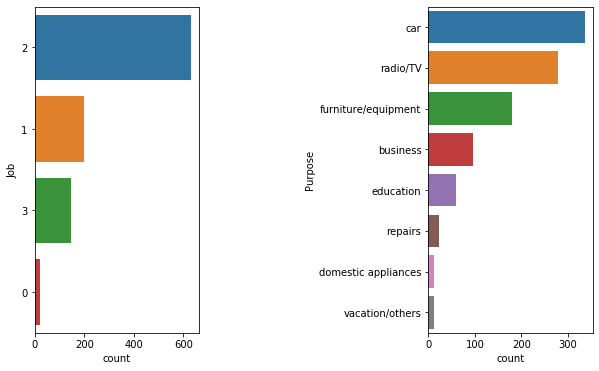

In [15]:
# Make the countplot from the numerical features
f = plt.figure(figsize=(10,6))

f.add_subplot(1,3,1)
sns.countplot(y=df['Job'], order=df['Job'].value_counts().index)

f.add_subplot(1,3,3)
sns.countplot(y=df['Purpose'], order=df['Purpose'].value_counts().index)

### Label Encoder

In [16]:
# Change the categorical variable with label encoder
from sklearn import preprocessing
df_le = df.apply(preprocessing.LabelEncoder().fit_transform)
df_le.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,48,1,2,1,0,0,142,2,5
1,3,0,2,1,0,1,770,29,5
2,30,1,1,1,0,0,390,8,3
3,26,1,2,0,0,0,848,26,4
4,34,1,2,0,0,0,734,17,1


We change the categorical variable withlabel encoder so that when a heatmap is made a correlation can appear and be correlated with other features.

### Correlation

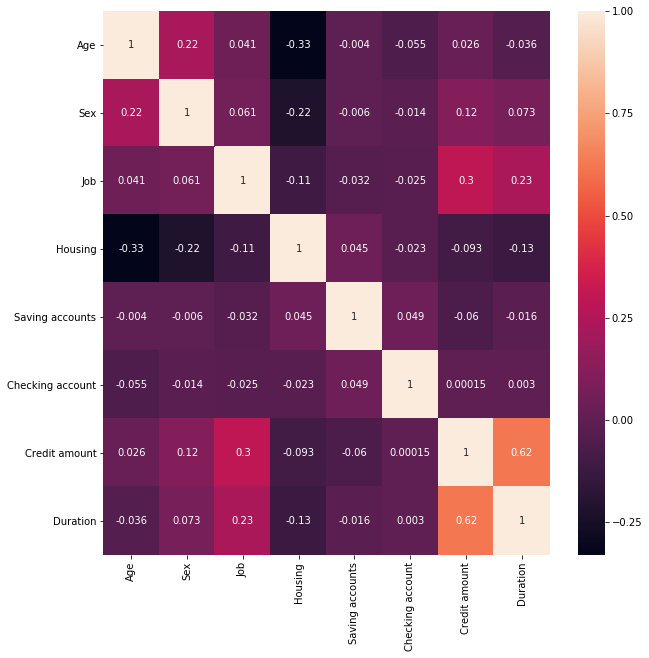

In [17]:
#create correlation
plt.figure(figsize=(10,10))
sns.heatmap(df_le.iloc[:,0:8].corr(method = 'spearman'),annot=True)

From the heatmap above we know that Duration and Credit amount has the highest correlation. The correlation of Credit amount and Duration is 0.62. So that we decided to doing clustering analysis based on Credit amount and Direction based on Age.

### Dataset for Clustering
For clustering analysis we only use the numerical variable : Age, Credit amount, and Duration

In [18]:
# Take the numerical variable for clustering analysis
df_X = df_num
df_X.head()

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24


### Conversion from DataFrame to Array

In [19]:
# Convert the DataFrame to array
X = np.asarray(df_X)
X

array([[  67, 1169,    6],
       [  22, 5951,   48],
       [  49, 2096,   12],
       ...,
       [  38,  804,   12],
       [  23, 1845,   45],
       [  27, 4576,   45]], dtype=int64)

## 1. K-Means Clustering

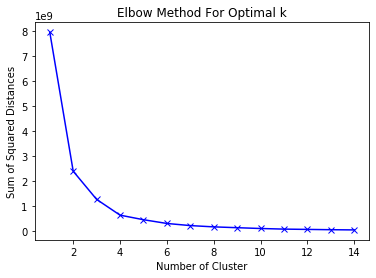

In [20]:
# Plotting scree plot from array X to know the position of the elbow
Sum_of_squared_distances = [] # dalam bentuk list
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_) # inertia : sum of squared distance

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Cluster')
plt.ylabel('Sum of Squared Distances') # WSS
plt.title('Elbow Method For Optimal k')
plt.show()

**Screeplot K-Means Clustering** <br>
From the screeplot we know that the position of the elbow is in the k = 3. So that we conclude that the nuber of cluster from K-Means clustering method is 3. <br>

In [21]:
# Activation K-Means Algorithm
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
# Show the centroid values that generated by K-Means Algorithm
print(kmeans.cluster_centers_)

[[   35.39213026  1914.02035278    16.8358209 ]
 [   35.95652174  5824.50241546    30.30917874]
 [   36.05357143 11695.58928571    39.66071429]]


In [23]:
# Show the K-Means clustering results in the form of array
print(kmeans.labels_)

[0 1 0 1 1 2 0 1 0 1 0 1 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1
 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 2 0 1 0 0 0 2 0 1 0 0 0 0 1 0 0 1
 0 0 1 1 2 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 2 1 1 1 0 0
 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 2 0 1 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 2 1 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 2 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 2 1 0 0 1 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 2 0 0 0 2 0 2 0 0 0 1 0 0 0 0 0 1 2 1 1 0 0 0 2 1 1 1 2
 1 0 0 0 0 0 0 0 2 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1
 2 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 2 2 1 0 0 2 0 0 2 0 0 1 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 2 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

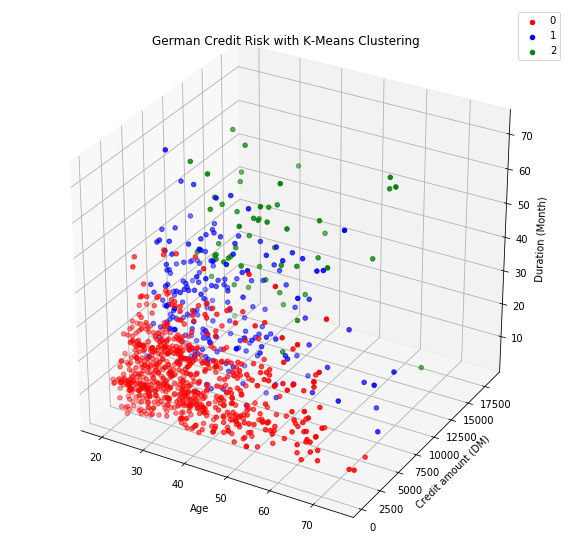

In [24]:
# Visualization of K-Means Clustering
from mpl_toolkits.mplot3d import Axes3D

x = X[:,0]
x1 = X[:,1]
x2 = X[:,2]
group= kmeans.labels_
color = ['red','blue','green']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for g in set(kmeans.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    xc = [x2[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
ax.legend()
ax.set_xlabel('Age')
ax.set_ylabel('Credit amount (DM)')
ax.set_zlabel('Duration (Month)')
plt.title("German Credit Risk with K-Means Clustering")
plt.show()

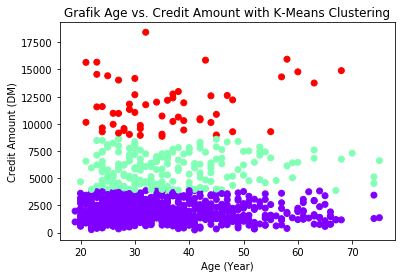

In [45]:
# Visualization of Age vs. Credit amount with K-Means Clustering
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Age (Year)')
plt.ylabel('Credit Amount (DM)')
plt.title('Grafik Age vs. Credit Amount with K-Means Clustering')
plt.show()

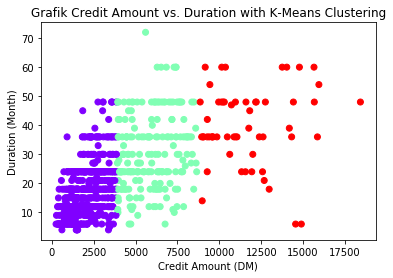

In [46]:
# Visualization of Credit amount vs. Duaration with K-Means Clustering
plt.scatter(X[:,1],X[:,2], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Credit Amount (DM)')
plt.ylabel('Duration (Month)')
plt.title('Grafik Credit Amount vs. Duration with K-Means Clustering')
plt.show()

**K-Means scatter plot** <br>
From the two scatter-plots above we can find out that Credit Amount has the highest influence in clustering analysis. The difference of clusters can be seen in the value of the Credit Amount. Because in the Age and Duration the value of Credit Amount is spread evenly. <br>

In [27]:
# Show the K-Means Clustering result in DataFrame
labels1 = kmeans.labels_
df['Cluster_KMeans'] = pd.DataFrame(labels1).round(0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster_KMeans
0,67,male,2,own,little,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,little,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,1


In [28]:
# Insert the clustering result in the array X
data_KM = pd.DataFrame(X)
data_KM['Cluster_KMeans'] = pd.DataFrame(kmeans.labels_)
data_KM = data_KM.sort_values('Cluster_KMeans')

array([[   67,  1169,     6,     0],
       [   40,  1358,    24,     0],
       [   32,   931,     6,     0],
       ...,
       [   23, 14555,     6,     2],
       [   26,  9960,    48,     2],
       [   21, 10144,    60,     2]], dtype=int64)

Text(0, 0.5, '')

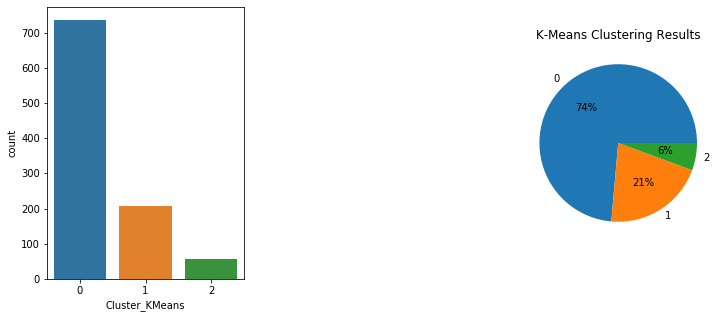

In [59]:
f = plt.figure(figsize=(12,5))

f.add_subplot(1,3,1)
sns.countplot(df['Cluster_KMeans'], order=df['Cluster_KMeans'].value_counts().index)

f.add_subplot(1,3,3)
df['Cluster_KMeans'].value_counts().plot.pie(autopct='%.0f%%')
plt.title('K-Means Clustering Results')
plt.ylabel('')

In [60]:
df['Cluster_KMeans'].value_counts()

0    736
1    208
2     56
Name: Cluster_KMeans, dtype: int64

In [30]:
grouped_Kmin = data_KM.groupby(['Cluster_KMeans']).min().round(0)
grouped_Kmin

,0,1,2
Cluster_KMeans,,,
0,19,250,4
1,20,3872,6
2,21,8858,6


In [31]:
grouped_Kmean = data_KM.groupby(['Cluster_KMeans']).mean().round(0)
grouped_Kmean

,0,1,2
Cluster_KMeans,,,
0,35.0,1911.0,17.0
1,36.0,5815.0,30.0
2,36.0,11696.0,40.0


In [32]:
grouped_Kmax = data_KM.groupby(['Cluster_KMeans']).max().round(0)
grouped_Kmax

,0,1,2
Cluster_KMeans,,,
0,75,3868,48
1,75,8648,72
2,68,18424,60


### K-Means Clustering Conclusion

There are 3 clusters that we make from the K-Means clustering. <br>
1. **Cluster 0** : Low Risk <br>
**There are 736 persons or equal with 74%** <br>
Age            19 - 75 years old <br>
**Credit Amount  250 - 3868 DM** <br>
Duration       4 - 48 Months <br>
2. **Cluster 1** : Medium Risk <br>
**There are 208 persons or equal with 21%** <br>
Age            20 - 75 years old <br>
**Credit Amount  3872 - 8648 DM** <br>
Duration       6 - 72 Months <br>
3. **Cluster 2** : High Risk <br>
**There are 56 persons or equal with 6%** <br>
Age            21 - 68 years old <br>
**Credit Amount  8858 - 18424 DM** <br>
Duration       6 - 60 Months <br>

From the summary above we know that for the features Age and Duration is not spesific different for each cluster. Butthe three cluster is spesifically difference from the Credit Amount. So we conclude that the result of the K-Means clustering is based on Credit Amount as follow: <br>
1. Cluster 0 : **Low Risk** <br>
Credit Amount 250 - 3868 DM and the average of credit amount is 1911 DM
2. Cluster 1 : **Medium Risk** <br>
Credit Amount 3872 - 8648 DM and the average of credit amount is 5815 DM
3. Cluster 2 : **High Risk** <br>
Credit Amount 8858 - 18424 DM and the average of credit amount is 11696 DM

## 2. Hierarchical Clustering

In [34]:
# Convert DataFrame to Array Y
Y = np.asarray(df_X)
Y

array([[  67, 1169,    6],
       [  22, 5951,   48],
       [  49, 2096,   12],
       ...,
       [  38,  804,   12],
       [  23, 1845,   45],
       [  27, 4576,   45]], dtype=int64)

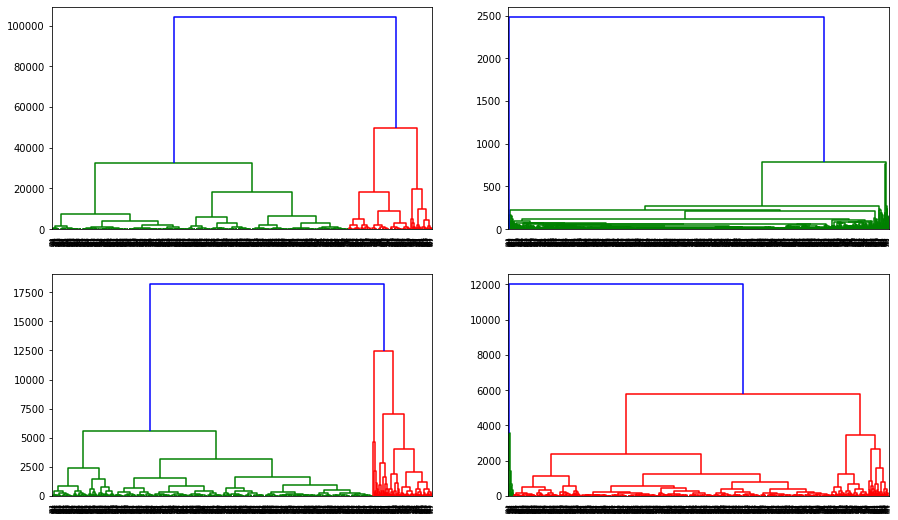

In [35]:
# Make dendogram with various Linkage
f=plt.figure(figsize=(15,9))

f.add_subplot(2,2,1)
# ward linkage
dendrogram = sch.dendrogram(sch.linkage(Y,method = 'ward'))

f.add_subplot(2,2,2)
# single linkage
dendrogram = sch.dendrogram(sch.linkage(Y,method = 'single'))

f.add_subplot(2,2,3)
# complete linkage
dendrogram = sch.dendrogram(sch.linkage(Y,method = 'complete'))

f.add_subplot(2,2,4)
# average linkage
dendrogram = sch.dendrogram(sch.linkage(Y,method = 'average'))

From the dendogram above we know that:
1. **Ward Linkage** <br>
There are 3 clusters that distributed well.
2. **Single Linkage** <br>
There only 1 cluster. It means that there is no cluster on the German Credit Risk. So we no need to do clustering analysis. And it also means that data is not distributed well.
3. **Complete Linkage** <br>
There are 3 clusters but not ditributed well.
4. **Average Linkage** <br>
There are 3 clusters but not ditributed well. <br>

<br>
So from the four linkages above we decided to choose Ward Linkage with 3 clusters for doing Hierarchical Clustering. <br>

In [36]:
# Fitting hierarchical clustering with 3 clusters from Ward Linkage
model = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
model.fit(Y)
labels2 = model.labels_
labels2

array([0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       2, 2, 0, 0, 0, 1, 2, 2, 2, 1, 2, 0, 0, 0, 0,

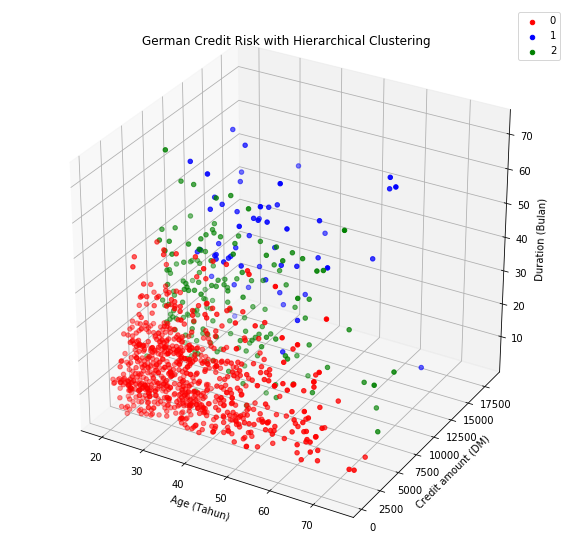

In [61]:
# Visualization of Hierarchical Clustering
from mpl_toolkits.mplot3d import Axes3D

x = Y[:,0]
x1 = Y[:,1]
x2 = Y[:,2]
group= model.labels_
color = ['red','blue','green']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for g in set(model.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    xc = [x2[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
ax.legend()
ax.set_xlabel('Age (Tahun)')
ax.set_ylabel('Credit amount (DM)')
ax.set_zlabel('Duration (Bulan)')
plt.title('German Credit Risk with Hierarchical Clustering')
plt.show()

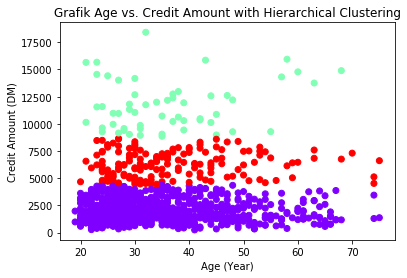

In [66]:
# Visualization of Age vs. Credit amount with Hierarchical Clustering
plt.scatter(Y[:,0],Y[:,1], c=model.labels_, cmap='rainbow')
plt.xlabel('Age (Year)')
plt.ylabel('Credit Amount (DM)')
plt.title('Grafik Age vs. Credit Amount with Hierarchical Clustering')
plt.show()

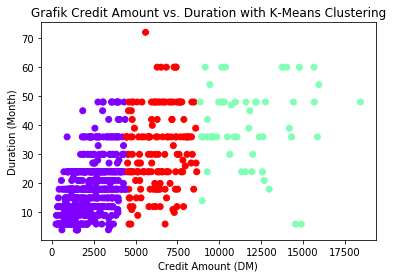

In [67]:
# Visualization of Credit amount vs. Duration with Hierarchical Clustering
plt.scatter(Y[:,1],Y[:,2], c=model.labels_, cmap='rainbow')
plt.xlabel('Credit Amount (DM)')
plt.ylabel('Duration (Month)')
plt.title('Grafik Credit Amount vs. Duration with K-Means Clustering')
plt.show()

In [38]:
# Show The Hierarchical Clustering Result in the DataFrame
labels2 = model.labels_
df['Cluster_HC'] = pd.DataFrame(labels2).round(0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster_KMeans,Cluster_HC
0,67,male,2,own,little,little,1169,6,radio/TV,0,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,2
2,49,male,1,own,little,little,2096,12,education,0,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,1,2
4,53,male,2,free,little,little,4870,24,car,1,2


Text(0, 0.5, '')

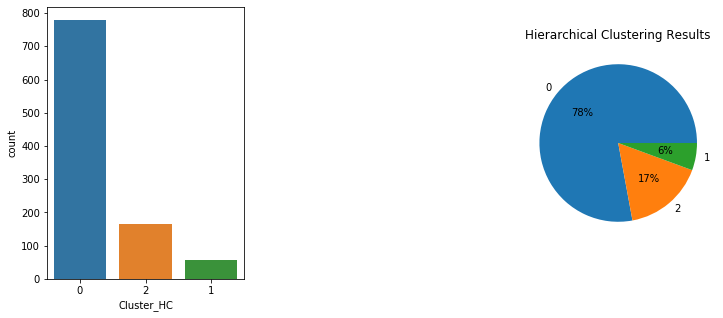

In [68]:
f = plt.figure(figsize=(12,5))

f.add_subplot(1,3,1)
sns.countplot(df['Cluster_HC'], order=df['Cluster_HC'].value_counts().index)

f.add_subplot(1,3,3)
df['Cluster_HC'].value_counts().plot.pie(autopct='%.0f%%')
plt.title('Hierarchical Clustering Results')
plt.ylabel('')

In [70]:
df['Cluster_HC'].value_counts()

0    779
2    165
1     56
Name: Cluster_HC, dtype: int64

In [74]:
# Insert the clustering result in the array Y
data_HC = pd.DataFrame(Y)
data_HC['Cluster_HC'] = pd.DataFrame(model.labels_)
data_HC = data_HC.sort_values('Cluster_HC')
data_HC.head()

,0,1,2,Cluster_HC
0,67,1169,6,0
610,22,741,12,0
611,48,1240,10,0
612,29,3357,21,0
613,22,3632,24,0


In [75]:
grouped_HCmin = data_HC.groupby(['Cluster_HC']).min().round(0)
grouped_HCmin

,0,1,2
Cluster_HC,,,
0,19,250,4
1,21,8858,6
2,20,4439,6


In [76]:
grouped_HCmean = data_HC.groupby(['Cluster_HC']).mean().round(0)
grouped_HCmean

,0,1,2
Cluster_HC,,,
0,35.0,2032.0,17.0
1,36.0,11696.0,40.0
2,37.0,6265.0,31.0


In [77]:
grouped_HCmax = data_HC.groupby(['Cluster_HC']).max().round(0)
grouped_HCmax

,0,1,2
Cluster_HC,,,
0,75,4380,48
1,68,18424,60
2,75,8648,72


### Hierarchical Clustering Conclusion

There are 3 clusters that we make from the Hierarchical clustering. <br>
1. **Cluster 0** : Low Risk <br>
**There are 779 persons or equal with 78%** <br>
Age            19 - 75 years old <br>
**Credit Amount  250 - 4380 DM** <br>
Duration       4 - 48 Months <br>
2. **Cluster 2** : Medium Risk <br>
**There are 56 persons or equal with 6%** <br>
Age            20 - 75 years old <br>
**Credit Amount  4439 - 8648 DM** <br>
Duration       6 - 72 Months <br>
3. **Cluster 1** : High Risk <br>
**There are 165 persons or equal with 17%** <br>
Age            21 - 68 years old <br>
**Credit Amount  8858 - 18424 DM** <br>
Duration       6 - 60 Months <br>

From the summary above we know that for the features Age and Duration is not spesific different for each cluster. Butthe three cluster is spesifically difference from the Credit Amount. So we conclude that the result of the K-Means clustering is based on Credit Amount as follow: <br>
1. Cluster 0 : **Low Risk** <br>
Credit Amount 250 - 4380 DM and the average of credit amount is 2032 DM
2. Cluster 2 : **Medium Risk** <br>
Credit Amount 4439 - 8648 DM and the average of credit amount is 6265 DM
3. Cluster 1 : **High Risk** <br>
Credit Amount 8858 - 18424 DM and the average of credit amount is 11696 DM

## 3. DBSCAN

In [39]:
# Konversi dataset ke array Y=Z
Z = np.asarray(df_X)
Z

array([[  67, 1169,    6],
       [  22, 5951,   48],
       [  49, 2096,   12],
       ...,
       [  38,  804,   12],
       [  23, 1845,   45],
       [  27, 4576,   45]], dtype=int64)

In [84]:
# Melakukan aktivasi algoritma DBSCAN
dbscan = DBSCAN(eps=145, min_samples=10, metric='euclidean')
dbscan.fit(Z)

DBSCAN(algorithm='auto', eps=145, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

**DBSCAN parameters** <br>
After trial many times, We decided to use epsilon = 145 and minimumpoints = 10 with euclidean distance methods for DBSCAN clustering in German Credit Risk dataset.

In [85]:
# Menampilkan label dibangkitkan oleh algoritma dbscan 
print(dbscan.labels_)

[ 0  1  0  2  0 -1  0  1  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0
  0  0  0  0  0  1  0  0  1  0  0  0  1  0  0  0  0  0  1  1  1  0  0  0
  2  0  0  1  0  0  0  0  1 -1  0  1  0  0  0 -1  0  0  0  0  0  0 -1  0
  0  1  0  0  0  0 -1  0  1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1
  0  0  0  2  0  0  0  0  0 -1  1  1  2  0  0  0  1  2  0  0  2  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  1  0  0 -1  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  2  1  0  0  0  0  0  0  0  0  2  0  0  0  0
  0  0  0  0  0  0  0  2  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  2  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0
  0  0  1  0 -1  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  2
  0  0  0 -1  1  0  2 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0

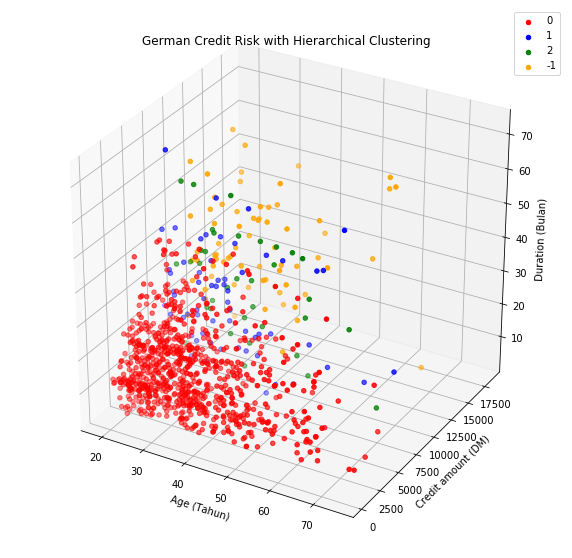

In [86]:
# Visualisasi Hierarchical Clustering
from mpl_toolkits.mplot3d import Axes3D

x = Z[:,0]
x1 = Z[:,1]
x2 = Z[:,2]
group= dbscan.labels_
color = ['red','blue','green','orange']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for g in set(dbscan.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    xc = [x2[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
ax.legend()
ax.set_xlabel("Age (Tahun)")
ax.set_ylabel("Credit amount (DM)")
ax.set_zlabel("Duration (Bulan)")
plt.title("German Credit Risk with Hierarchical Clustering")
plt.show()

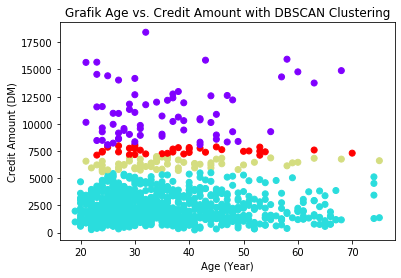

In [87]:
# Visualization of Age vs. Credit amount with DBSCAN Clustering
plt.scatter(Y[:,0],Y[:,1], c=dbscan.labels_, cmap='rainbow')
plt.xlabel('Age (Year)')
plt.ylabel('Credit Amount (DM)')
plt.title('Grafik Age vs. Credit Amount with DBSCAN Clustering')
plt.show()

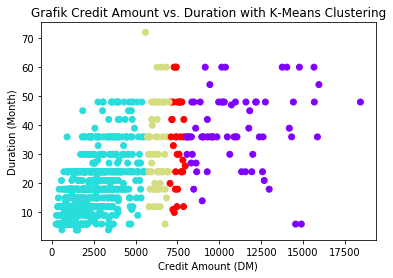

In [88]:
# Visualization of Credit amount vs. Duration with DBSCAN Clustering
plt.scatter(Y[:,1],Y[:,2], c=dbscan.labels_, cmap='rainbow')
plt.xlabel('Credit Amount (DM)')
plt.ylabel('Duration (Month)')
plt.title('Grafik Credit Amount vs. Duration with K-Means Clustering')
plt.show()

In [43]:
# Menampilkan hasil DBSCAN Clustering pada DataFrame
labels3 = dbscan.labels_
df['Cluster_DBSCAN'] = pd.DataFrame(labels3).round(0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster_KMeans,Cluster_HC,Cluster_DBSCAN
0,67,male,2,own,little,little,1169,6,radio/TV,0,0,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,2,1
2,49,male,1,own,little,little,2096,12,education,0,0,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,1,2,2
4,53,male,2,free,little,little,4870,24,car,1,2,0


Text(0, 0.5, '')

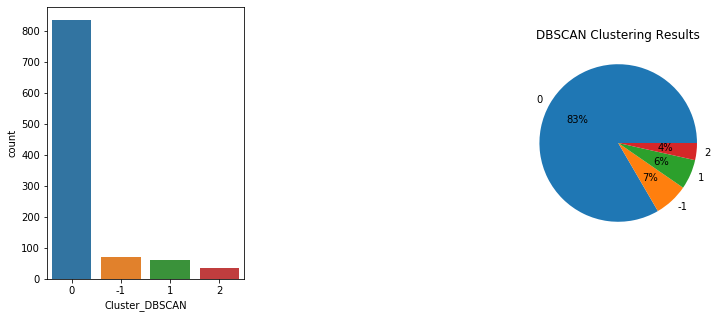

In [97]:
f = plt.figure(figsize=(12,5))

f.add_subplot(1,3,1)
sns.countplot(df['Cluster_DBSCAN'], order=df['Cluster_DBSCAN'].value_counts().index)

f.add_subplot(1,3,3)
df['Cluster_DBSCAN'].value_counts().plot.pie(autopct='%.0f%%')
plt.title('DBSCAN Clustering Results')
plt.ylabel('')

In [91]:
# Insert the clustering result in the array Z
data_DB = pd.DataFrame(Z)
data_DB['Cluster_DBSCAN'] = pd.DataFrame(dbscan.labels_)
data_DB = data_DB.sort_values('Cluster_DBSCAN')
data_DB.head()

,0,1,2,Cluster_DBSCAN
491,42,8318,27,-1
373,63,13756,60,-1
374,60,14782,60,-1
854,45,10875,36,-1
378,57,14318,36,-1


In [98]:
df['Cluster_DBSCAN'].value_counts()

 0    834
-1     70
 1     61
 2     35
Name: Cluster_DBSCAN, dtype: int64

In [92]:
grouped_DBmin = data_DB.groupby(['Cluster_DBSCAN']).min().round(0)
grouped_DBmin

,0,1,2
Cluster_DBSCAN,,,
-1,21,8065,6
0,19,250,4
1,21,5595,6
2,23,7057,10


In [94]:
grouped_DBmean = data_DB.groupby(['Cluster_DBSCAN']).mean().round(0)
grouped_DBmean

,0,1,2
Cluster_DBSCAN,,,
-1,35.0,11025.0,38.0
0,35.0,2220.0,18.0
1,37.0,6306.0,32.0
2,39.0,7513.0,34.0


In [95]:
grouped_DBmax = data_DB.groupby(['Cluster_DBSCAN']).max().round(0)
grouped_DBmax

,0,1,2
Cluster_DBSCAN,,,
-1,68,18424,60
0,75,5511,48
1,75,6999,72
2,70,7980,60


### DBSCAN Clustering Conclusion

There are 3 clusters that we make from the Hierarchical clustering. <br>
1. **Cluster 0** : Low Risk <br>
**There are 834 persons or equal with 83%** <br>
Age            19 - 75 years old <br>
**Credit Amount  250 - 5511 DM** <br>
Duration       4 - 48 Months <br>
2. **Cluster 1** : Medium Risk <br>
**There are 61 persons or equal with 7%** <br>
Age            21 - 75 years old <br>
**Credit Amount  5595 - 6999 DM** <br>
Duration       6 - 72 Months <br>
3. **Cluster 2** : High Risk <br>
**There are 35 persons or equal with 6%** <br>
Age            23 - 70 years old <br>
**Credit Amount  7057 - 7980 DM** <br>
Duration       6 - 60 Months <br>
4. **Cluster -1** : Noise <br>
**There are 70 persons or equal with 4%** <br>
Age            21 - 69 years old <br>
**Credit Amount  8065 - 18424 DM** <br>
Duration       6 - 60 Months <br>

From the summary above we know that for the features Age and Duration is not spesific different for each cluster. But the three cluster is spesifically difference from the Credit Amount. So we conclude that the result of the K-Means clustering is based on Credit Amount as follow: <br>
1. Cluster 0 : **Low Risk** <br>
Credit Amount  250 - 5511 DM and the average of credit amount is 2220 DM
2. Cluster 2 : **Medium Risk** <br>
Credit Amount 5595 - 6999 DM and the average of credit amount is 6306 DM
3. Cluster 1 : **High Risk** <br>
Credit Amount 7057 - 7980 DM and the average of credit amount is 7513 DM

## Conclusion

### 1. Cluster Segmentation
From the three clustering methods performed: K-Means, Hierarchical, and DBScan clustering there are three clusters from German Credit Risk Dataset. There are Low Risk, Medium Risk, and High Risk. The difference is, in the DBScan not all the data is used, because there are noise. It indicated from the outliers.

### 2. Metode Clustering

From the three methods that have been done in our opinion a good method and more accurate than other methods is K-Means. Because when using K-Means the human error can be minimized. For example: when using Hierarchical Clustering we must determine the dendogram intersection, then when using DBSCAN Clustering we must determine the epsilon value and minimum points in one cluster. So from the weaknesses of the other two methods, I decided to choose K-Means to do clustering analysis on German Credit Scoring data.

### 3. Business Insight

From the three clustering methods that have been carried out there are 3 groups: low risk, medium risk, and high risk. If seen from the proportions of each cluster, the majority are at low risk. So it can be said that the company is in good health. because the majority of creditors can afford to pay the credit submitted. The majority of credit submitted can be completed in 32 weeks.